### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
#your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from datetime import datetime

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
#your code here
rating_df=pd.read_csv('Data.csv')
movie_df=pd.read_csv('item.csv')
user_df=pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
#your code here

# a function is defined accepting a dataframe as an argument and printing all required data
def dataframe_basic_info(dataframe):
    print('info about dataframe')
    print(dataframe.info())
    print('*--------------------------------------------------------------*')
    print('Shape of dataframe:')
    print(dataframe.shape)
    print('*--------------------------------------------------------------*')
    print('basic statistics about dataframe:')
    print(dataframe.describe().T)
    print('*--------------------------------------------------------------*')
    print('How many null values?')
    print(dataframe.isnull().sum())
    print('****************************************************************')
    print('****************************************************************')

print('---------------------')
print('|  rating dataset:  |')
print('---------------------')
dataframe_basic_info(rating_df)
print('---------------------')
print('|   movie dataset:  |')
print('---------------------')
dataframe_basic_info(movie_df)
print('---------------------')
print('|   user dataset:   |')
print('---------------------')
dataframe_basic_info(user_df)

---------------------
|  rating dataset:  |
---------------------
info about dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None
*--------------------------------------------------------------*
Shape of dataframe:
(100000, 4)
*--------------------------------------------------------------*
basic statistics about dataframe:
              count          mean           std          min          25%  \
user id    100000.0  4.624848e+02  2.666144e+02          1.0        254.0   
movie id   100000.0  4.255301e+02  3.307984e+02          1.0        175.0   
rating     100000.0  3.529860e+00  1.125674e+00          1.0          3.0   
timestamp  100000.0  8.835289e+08  5.343856e+06  874724710.0  879448709.5   

                   50%          75%    

**Observations:**
Dataset of ratings is entirely consisted of integer values, even a timestamp. It has 100000 of rows in 4 columns. Basic statistic of columns is mainly meaningless, except for the rating. User id, movie id and timestamp are not susceptible to any interpretation provided by describe() function of pandas. However, it can be easly seen that rating ranges from 0 to 5, mean rating is 3.52 and is below median, 50% of all ratings have been marked with 4.0, which is closer to max value. All of it may indicate left skewness of ratings. There are no null values indicated in this dataset.

Movie dataset is mainly consisted of integer values (20 columns) and 2 objects. It has 1681 rows in 22 columns. The same observation as for previous dataset with regards to sesceptibilty to interpretation of results of describe() function applys on movie_id, however, the rest looks like dummy variables since the values ranges from 0 to 1. It is reasonable to beleive if the unique() function has been applied to those columns, it would show only 2 values: 0 and 1. This dataset has no nulll values as well.

User dataset has again two data types: 2 64 bits integer and 3 objects. It has 943 rows in 5 columns. 3 variables of each case are categorical and are not included in the results of describe() function. Ages ranges from 7 to 73, mean value for age is 34.05 with standard deviation of 12.19 years. 50% of people who provided ratings were below 31 years of age. In coclusion, it may indicate right skewness of the data distribution. there are no null values identified in this dataset.   


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [15]:
#to provide some extra info, there are some variables introduced like genre_list, number_list and total 
total=0
genre_list=[]
number_list=[]

#running through columns of genres
for i in range (3,len(movie_df.columns)):
    
    #checking if there are only two discrete values in each column to confirm if it is a dummy variable
    if (len(movie_df[movie_df.columns[i]].unique())==2):
        #first option: returning a number of values for 0 and 1 and taking the result for 1 - hence [1] at the end
        print ('Number of movies per', movie_df.columns[i],'genre is',movie_df[movie_df.columns[i]].value_counts()[1]) 
        #second option to check number of movies per genre - to sum values of 1s for each case where particular genre is applicable
        print('Number of movies per', movie_df.columns[i],'genre is',movie_df[movie_df.columns[i]].sum())
        
        
        #generating a list of genres and a list of numbers to be used to generate dataframe from it
        genre_list.append(movie_df.columns[i])
        number_list.append(movie_df[movie_df.columns[i]].value_counts()[1])
        #calculating a total number of movies from all genres
        total=total+movie_df[movie_df.columns[i]].value_counts()[1]

#generating a dataframe
genre_number_df=pd.DataFrame({"Genre": genre_list,
                             "Number": number_list})

print('Most common genre is ',genre_number_df.iloc[genre_number_df[genre_number_df['Number']==genre_number_df['Number'].max()].index[0],0])
print('Total sum of all movies per genre is', total, ', but number of movies is', len(movie_df['movie id'].unique()))

Number of movies per Action genre is 251
Number of movies per Action genre is 251
Number of movies per Adventure genre is 135
Number of movies per Adventure genre is 135
Number of movies per Animation genre is 42
Number of movies per Animation genre is 42
Number of movies per Childrens genre is 122
Number of movies per Childrens genre is 122
Number of movies per Comedy genre is 505
Number of movies per Comedy genre is 505
Number of movies per Crime genre is 109
Number of movies per Crime genre is 109
Number of movies per Documentary genre is 50
Number of movies per Documentary genre is 50
Number of movies per Drama genre is 725
Number of movies per Drama genre is 725
Number of movies per Fantasy genre is 22
Number of movies per Fantasy genre is 22
Number of movies per Film-Noir genre is 24
Number of movies per Film-Noir genre is 24
Number of movies per Horror genre is 92
Number of movies per Horror genre is 92
Number of movies per Musical genre is 56
Number of movies per Musical genre 

**Insights:**
Number of movies per genre is obtained by counting the number of times genre is associated with a movie. This association is done by assigning a value 1 if certain genre(variable) correspond to certain movie, or 0 otherwise. at the end, we can count number of zeros and ones for each column(genre/variable) and use a result for values of ones. In addition, second proposal is presented where the sum is done on each column, since dummy varibale receives values 0 or 1 only.
Most common genre is drama. This info has been obtained from a dataframe which has been gnerated from two lists while running through the loop of columns.
At the end, the sum of numbers of movies per genre is calculated, showing it is larger then total number of movies. That is because one movie may have more than one genre. 


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [5]:
#your code here

#checking if row with unknown genre exists by identfying number of unique values in that variable
if len(movie_df['unknown'].unique())==2:
    movie_df.drop(index=movie_df[movie_df['unknown']==1].index[0], axis=0, inplace=True)
    movie_df.reset_index
#to check if such rows have been removed - the same principle used as above in if statement
movie_df['unknown'].unique()

array([0])

**Insights:**
To drop the movie where the genre is unknown, drop() function has been used. To identfy the row which should be droped, the index of sub-dataframe obtained by "movie_df[movie_df['unknown']==1]" has been extracted and passed to drop() function as an index parameter. Axis is set to 0 since we are deleting a row and by setting parametre inplace=True we are recording a change to original dataframe.

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [46]:
#your code here

#copying a dataframe
movie_df_nr_genres=movie_df.copy()
#summing only genres columns; if all the columns were used - e.g. movie_df.sum(axis=1) movie id would be added to sum. 
movie_df_nr_genres['Nr of genres']=movie_df.iloc[:,3:len(movie_df.columns)].sum(axis=1)

#finding totl number of movies with more than one genre based on number of unique movie titles
print('Total number of movies with more than one genre is',len(movie_df_nr_genres[movie_df_nr_genres['Nr of genres']>1]['movie title'].unique()))

#printing only those which have more than one genre
print(movie_df_nr_genres[movie_df_nr_genres['Nr of genres']>1][['movie title', 'Nr of genres']])

#since the shape of above dataframe indicated more movies than those proesented by unique() function, this dataframe shows only those which are not duplicated
movie_df_nr_genres[(movie_df_nr_genres['Nr of genres']>1)&(movie_df_nr_genres['movie title'].duplicated()==False)][['movie title', 'Nr of genres']]

Total number of movies with more than one genre is 838
                               movie title  Nr of genres
0                               Toy Story              3
1                               GoldenEye              3
3                              Get Shorty              3
4                                 Copycat              3
6                          Twelve Monkeys              2
7                                    Babe              3
9                             Richard III              2
10                          Seven (Se7en)              2
11                    Usual Suspects, The              2
13                            Postino, Il              2
15            French Twist (Gazon maudit)              2
16                    From Dusk Till Dawn              5
19                     Angels and Insects              2
20                 Muppet Treasure Island              5
21                             Braveheart              3
22                            Tax

,movie title,Nr of genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
7,Babe,3
9,Richard III,2
10,Seven (Se7en),2
11,"Usual Suspects, The",2
13,"Postino, Il",2


**Insights:**
Finding movies whith more than one genre was done based on sum of values of all columns per each movie title, however, the problem occured when the total number of such movies had to be presented. If we use unique() function on resulting dataframe's column 'movie title', it shows 838 unique movie titles, however, the shape of resulting dataframe indicate larger set of movie titles: 849. It indicated there were some duplicates in movie title but with different movie id because "movie_df_nr_genres[['movie title', 'movie id']].duplicated().sum()" gives 0 as a result.
If we strengthen the conditions for dataframe to be printed, adding also "movie_df_nr_genres['movie title'].duplicated()==False", we obtain dataframe with 836 rows, which is less by the amount of 2 from what would be expected based on unique movie titles. 


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [13]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


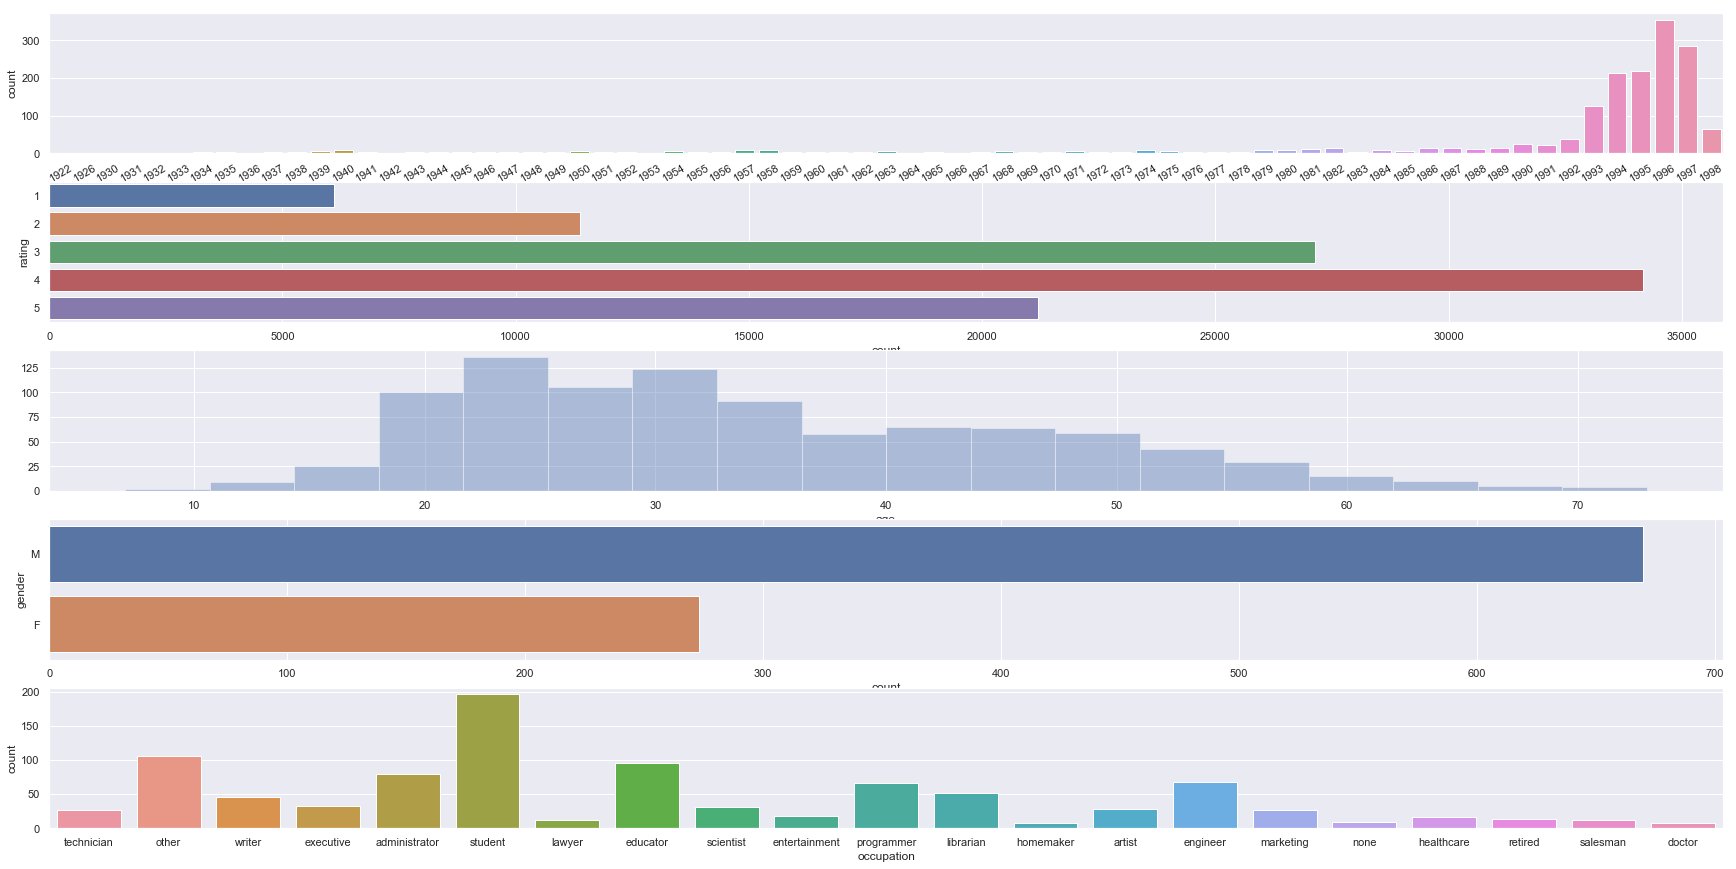

In [7]:
#your code here

#converting string dtype of release date to datetime object to facilitate extraction of a year
movie_df_task_seven=movie_df.copy()
movie_df_task_seven['python release date']=movie_df_task_seven['release date'].apply(lambda x: datetime.strptime(x, '%d-%b-%Y'))
movie_df_task_seven['release year']=movie_df_task_seven['python release date'].dt.year


fig, axs=plt.subplots(nrows=5, figsize=(30,15))
plot=sns.countplot(x='release year', data=movie_df_task_seven, ax=axs[0])
plt.setp(plot.get_xticklabels(), rotation=30)
sns.countplot(y='rating', data=rating_df, ax=axs[1])
sns.distplot(user_df['age'], ax=axs[2], kde=False)
sns.countplot(y='gender', data=user_df, ax=axs[3])
sns.countplot(x='occupation', data=user_df, ax=axs[4])


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

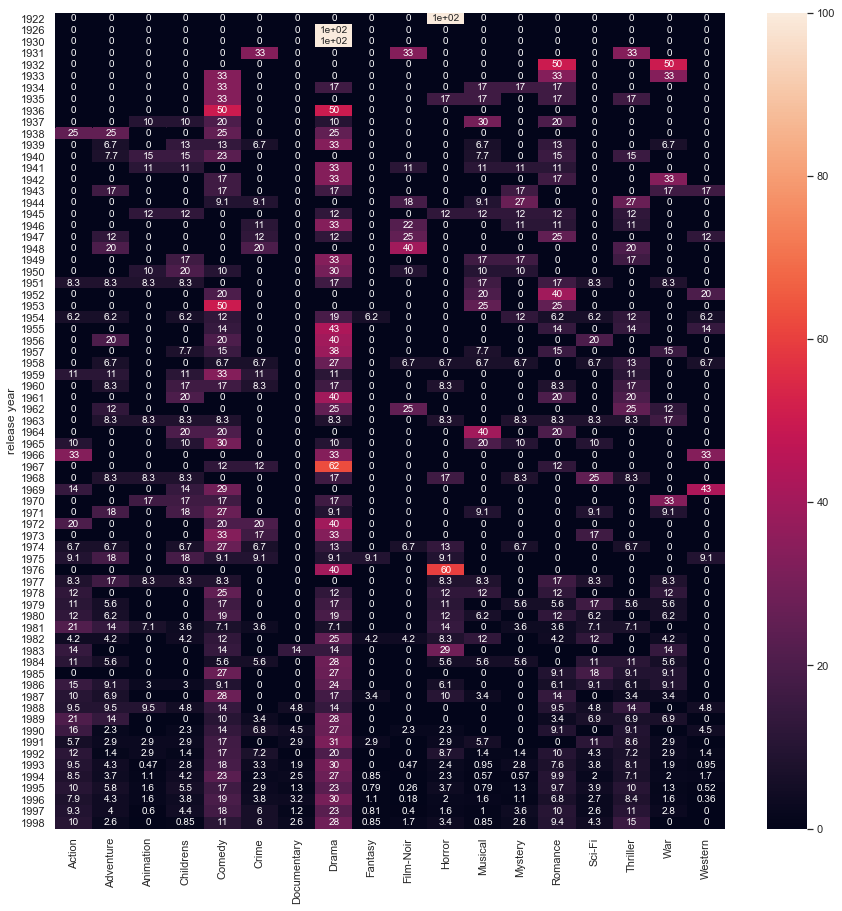

In [10]:
#your code here

#copying dataframe with information about release date and genres to preserve original dataframe
genre_popularity_df=movie_df.copy()

#converting str dtype representing timestamp to datetime object 
genre_popularity_df['python_rel_date']=genre_popularity_df['release date'].apply(lambda x: datetime.strptime(x, '%d-%b-%Y'))

#extracting a year from datetime object
genre_popularity_df['release year']=genre_popularity_df['python_rel_date'].dt.year

#generating a dataframe by grouping all genres per year of publication
agregated_genres_per_years=genre_popularity_df.groupby('release year')[list(genre_popularity_df.columns[4:22])].sum()

#summing movies published in each year
agregated_genres_per_years['total']=agregated_genres_per_years.sum(axis=1)

#generating a new dataframe where each genre per year is expressed in a form of percentage of total puplished movies in that year
agr_genres_per_years_percentage=agregated_genres_per_years.div(agregated_genres_per_years['total'],axis=0)*100

#removing a total column because it is not needed for plotting the heatmap
agr_genres_per_years_percentage.drop('total', axis=1, inplace=True)

#plotting a heatmap from a dataframe where indexes are years and columns are genres.
fig=plt.figure(figsize=(15,15))
sns.heatmap(agr_genres_per_years_percentage, annot=True)

**Insights:**
To properly prepare a dataset for visualisation, the transformation of timestamp had to be done from string to datetime object. This made extraction of years of release simple. The format was recognized based on a table given here: https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior This was followed by grouping of genre columns based on year of release and finaly calculating the percentage of each genre in total number of movies produced for each year.

Heatmap shows that comedy and drama are represented through whole period, while fantasy and documentry are more represented in last decade. Drama is, by far, the most represented genre through entire period, having stable share in movie releases, followed by comedy. Film-noir had one peak during 1940ties, while it shows low to zero share in other periods, rendering it as least popular genre. Only two genres had 100% share for particular years, and it was during early period - 1922 for Horror, and in 1926 and 1930 for Drama. It may indicate the data collected for such early stages is incomplete, not recording some movies of other genres and is most probably influenced by low number of movies released during that period. Western was most popular genre in 1969 according to share in movie releases, having 43% of share, but, with some other exceptions, mostly unpopular genre. It is also noticable the variety of genres in released movies have increased over time.  

### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [12]:
#your code here
#merging 2 dataframes: one having the collection of all ratings, and the other having info about movies. 
#Mergening is done on movie id, and inner type of merge to return only a crosscheck of those 2 df. We are not interested in results which wouldn,t have rating (from move df) or the ones whcih might not have info about movie  
movie_rating_df=pd.merge(rating_df, movie_df, how='inner', on='movie id')[['movie id','rating','movie title']]

#Creating 2 series from same column rating. One with number of ratings and the other with mean rating.
#Since two columns of new aggregated_df is derivated from one column of movie_rating_df, this method enables two different names in final aggregated_df for those two results
#Series no1
number_of_rating_series=movie_rating_df.groupby('movie id')['rating'].count()
#renaming a series to distinguish from 'rating'
number_of_rating_series.rename("Number of ratings", inplace=True)
#Series no2
mean_rating_series=movie_rating_df.groupby('movie id')['rating'].mean()
#renaming a series to distinguish from 'rating'
mean_rating_series.rename("Mean rating", inplace=True)

#generating new dataframe from two series
aggregated_df=pd.concat([number_of_rating_series, mean_rating_series], axis=1)

#merging aggregated_df with original movie_rating_df where the duplicates on movie id and movie title have been removed <-- first paramtre to merge
aggregated_df=pd.merge(movie_rating_df[['movie id','movie title']].drop_duplicates(), aggregated_df, how='inner', on='movie id')

#printing all with number of ratings larger then 100 and sorting it in descending order and showing only first 25
aggregated_df[aggregated_df['Number of ratings']>100].sort_values('Mean rating', ascending=False).head(25)


,movie id,movie title,Number of ratings,Mean rating
180,408,"Close Shave, A",112,4.491071
200,318,Schindler's List,298,4.466443
277,169,"Wrong Trousers, The",118,4.466102
174,483,Casablanca,243,4.456790
239,64,"Shawshank Redemption, The",283,4.445230
36,603,Rear Window,209,4.387560
297,12,"Usual Suspects, The",267,4.385768
357,50,Star Wars,583,4.358491
185,178,12 Angry Men,125,4.344000
260,134,Citizen Kane,198,4.292929


# 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [14]:
# your code here

#merging dataframes where movie genres and ratings can be found and, at the same time, dropping unneccessary columns
movie_rating_df=pd.merge(rating_df, movie_df, how='inner', on='movie id').drop(['unknown','movie id','movie title', 'release date', 'rating', 'timestamp'], axis=1)

#initializing final_df by grouping previously merged dataframe by user id, obtaining a sum of all ratings per user 
final_df=movie_rating_df.groupby('user id')[movie_rating_df.columns.tolist()[1:]].sum()

#merging previously initialized df with user_df to obtain data on gender of user id and, at the same time, dropping unwanted columns
final_df=pd.merge(user_df, final_df, how='inner', on='user id').drop(['user id', 'age', 'occupation', 'zip code'], axis=1)

#grouping results by gender to obtain a summ of ratings for each genre per gender
final_df=final_df.groupby('gender')[final_df.columns.tolist()[1:]].sum()

#scaling the result of sum per genre per gender to a percentage relative to total ratings of each gender
#when calculating for men for each genre, we have to divide with total number of ratings received from men 
final_df.loc['M']=(final_df.loc['M']/final_df.sum(axis=1).loc['M'])*100
#when calculating for women for each genre, we have to divide with total number of ratings received from women
final_df.loc['F']=(final_df.loc['F']/final_df.sum(axis=1).loc['F'])*100

final_df

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385


**Conclusion:**
For the results to be comparable, we had to scale result based on total number of ratings received from each gender.  In gneral, men gave much more ratings, but when the percentage was calculated based on total number of ratings received by each gender, we got comparable results to obtain final conclusions. Based on processed data, we can easily conclude all statments were incorrect. In particular, there were 18.18% of all men who rated(watched) a movie which is marked as drama, while there were 20.49% of women tho gave rating for the same genre. 
Sci fi was rated more frequently (compared to total population of mens ratings in dataset) by men(6.35%) while only 4.89% of all womens ratings were related to this genre. Contrary, romance was rated by 10.91% womens ratings, while only 8.56% of mens ratings were related to movie with such genre. 
